In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Weekly Sales Trends

* ### Significant fluctuations in weekly sales with distinct peaks suggest seasonal spikes, likely corresponding to major holidays or events.
* ### The overall sales trend appears stable, with occasional sharp increases pointing to high-demand periods.

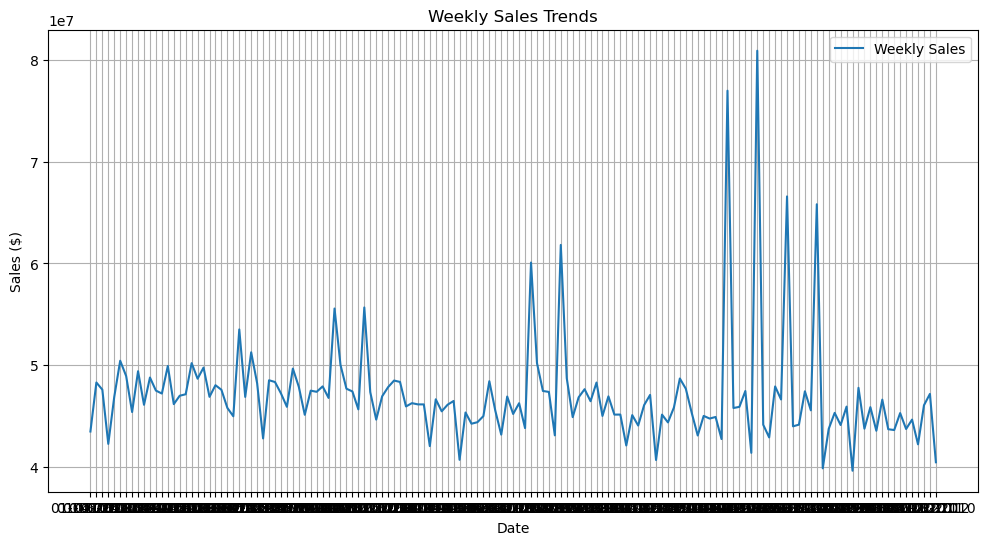

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/Users/tanishq/Desktop/Projects/Walmart_Sales.csv')

# Weekly sales trends
sales_trends = data.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12, 6))
plt.plot(sales_trends.index, sales_trends.values, label='Weekly Sales')
plt.title('Weekly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.grid()
plt.legend()
plt.show()



## Yearly Sales
* ### Sales were highest in 2011 compared to 2010 and 2012.
* ### A potential peak in sales during 2011 could indicate strong performance driven by economic factors, promotional campaigns, or expansions.

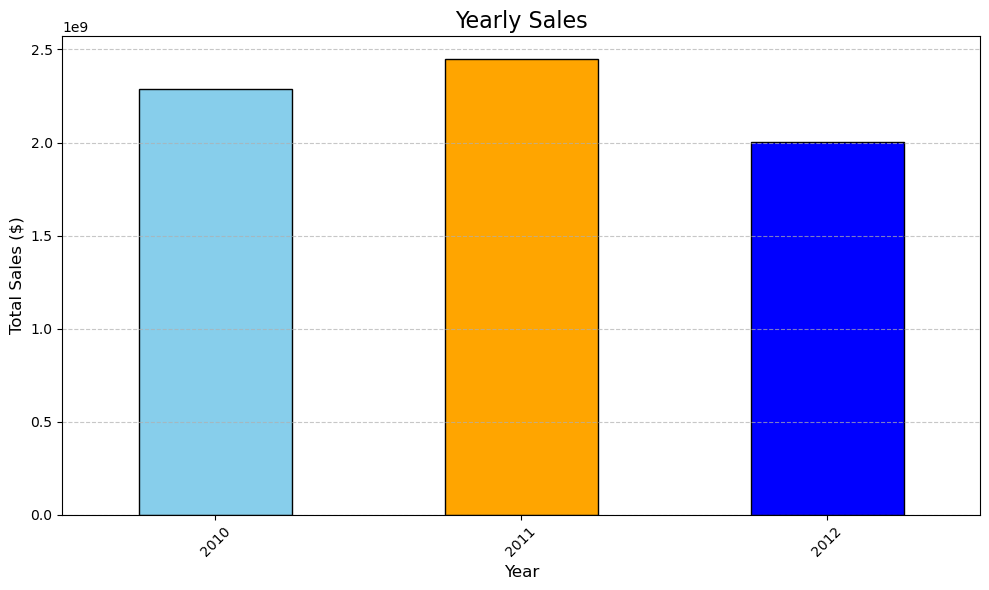

In [45]:

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# Extract the year from the 'Date' column
data['Year'] = data['Date'].dt.year

# Group sales by year
yearly_sales = data.groupby('Year')['Weekly_Sales'].sum()

# Plot yearly sales
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color=['skyblue', 'orange', 'blue'], edgecolor='black')
plt.title('Yearly Sales', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Holiday vs Non- Holiday Sales
* ### Holiday weeks generate significantly higher average sales compared to non-holiday weeks, confirming the critical role of holidays in boosting revenue.

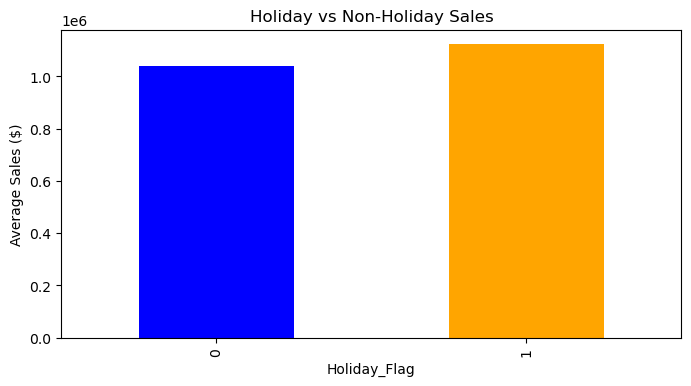

In [5]:
# Holiday vs. non-holiday sales
holiday_sales = data.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', figsize=(8, 4), color=['blue', 'orange'], title='Holiday vs Non-Holiday Sales')
plt.ylabel('Average Sales ($)')
plt.show()



## Average Monthly Sales
* ### December stands out with the highest sales, likely driven by holiday shopping. February and March also show moderate peaks, hinting at potential seasonal or promotional influences.

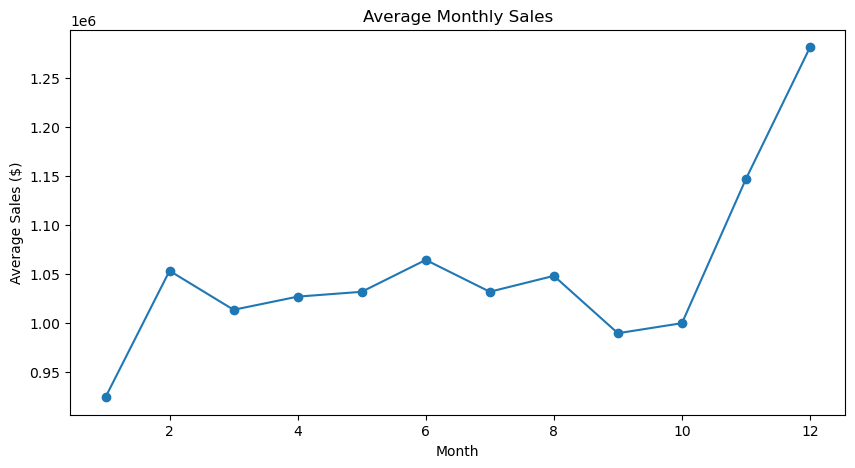

In [47]:
data['Month'] = data['Date'].dt.month
# Group by month and calculate average sales
monthly_sales = data.groupby('Month')['Weekly_Sales'].mean()

# Plotting the trends
monthly_sales.plot(kind='line', figsize=(10, 5), title='Average Monthly Sales', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Sales ($)')
plt.show()



## Correlation Matrix
* ### Weekly sales show minimal correlation with external factors like temperature, fuel prices, and CPI.
* ### A slight negative correlation with unemployment suggests economic downturns might impact consumer spending.

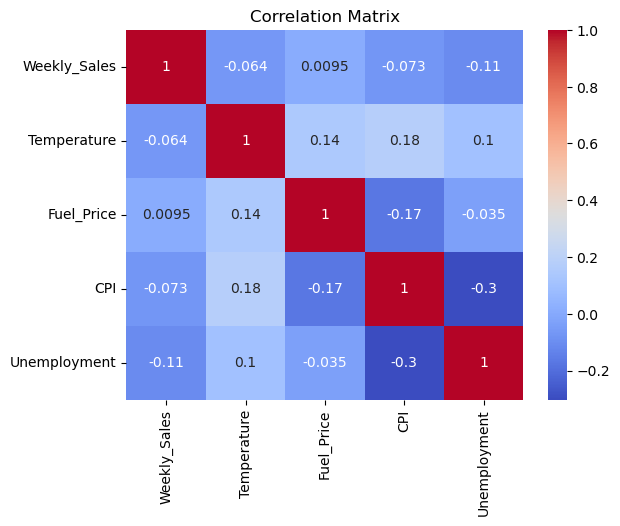

In [6]:
# Correlation heatmap
corr_matrix = data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Sales Heatmap by Week and Store
* ### Specific stores dominate during certain weeks, likely due to local events or market conditions.

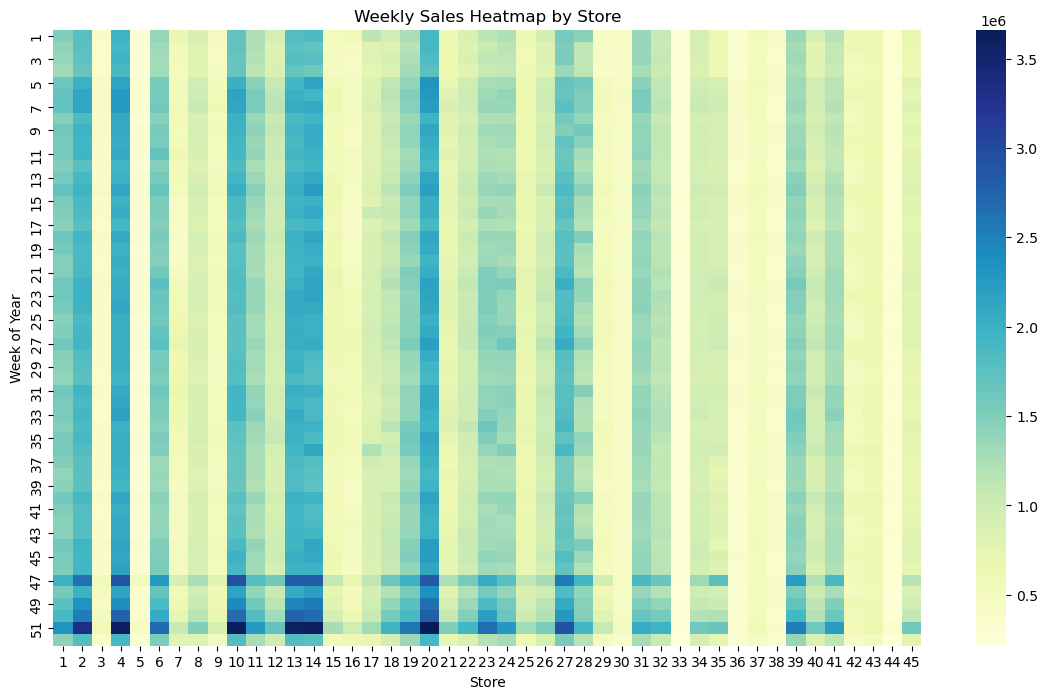

In [9]:
data['Week'] = data['Date'].dt.isocalendar().week

heatmap_data = data.pivot_table(index='Week', columns='Store', values='Weekly_Sales', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False)
plt.title('Weekly Sales Heatmap by Store')
plt.xlabel('Store')
plt.ylabel('Week of Year')
plt.show()


## Holiday Impact on Sales
* ### Holiday sales are nearly double non-holiday sales, underlining the significant impact of holidays on overall revenue, making them strategic periods for marketing efforts.

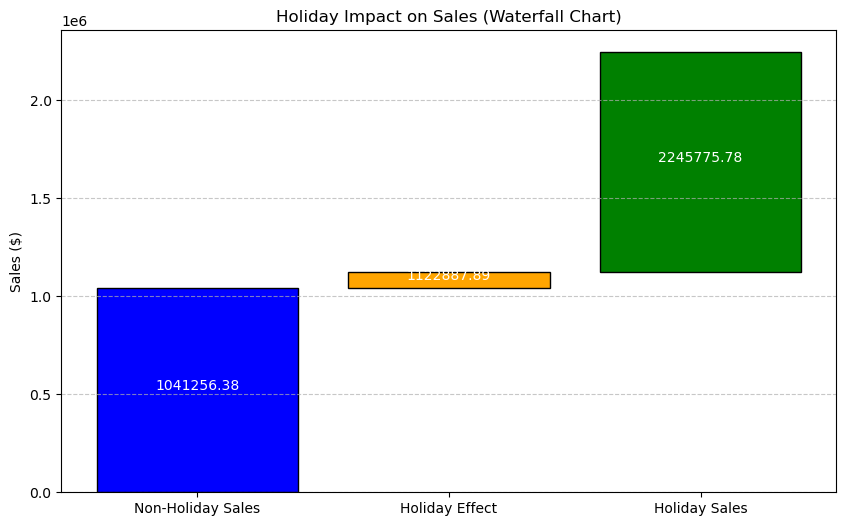

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for Holiday Sales Impact
categories = ['Non-Holiday Sales', 'Holiday Effect', 'Holiday Sales']
values = [holiday_sales[0], holiday_sales[1] - holiday_sales[0], holiday_sales[1]]

# Calculate cumulative values for the waterfall chart
cumulative = np.cumsum([0] + values[:-1])

# Bar colors
colors = ['blue', 'orange', 'green']

# Plot waterfall chart
plt.figure(figsize=(10, 6))
for i in range(len(values)):
    plt.bar(categories[i], values[i], bottom=cumulative[i], color=colors[i], edgecolor='black')

# Add cumulative labels
for i in range(len(cumulative)):
    plt.text(i, cumulative[i] + values[i] / 2, f'{cumulative[i] + values[i]:.2f}', ha='center', color='white')

plt.title('Holiday Impact on Sales (Waterfall Chart)')
plt.ylabel('Sales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Temperature vs Sales
* ### Weekly sales are not strongly correlated with temperature. Sales spikes (larger bubbles) are more evident during holidays, as shown by red-colored bubbles.

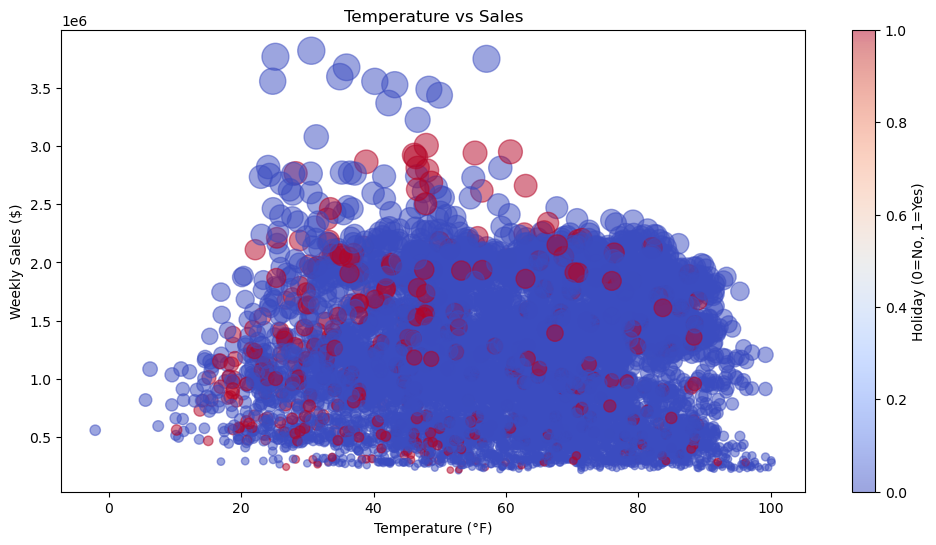

In [11]:
plt.figure(figsize=(12, 6))
bubble_size = data['Weekly_Sales'] / 1e4  # Scale bubble size
plt.scatter(data['Temperature'], data['Weekly_Sales'], s=bubble_size, alpha=0.5, c=data['Holiday_Flag'], cmap='coolwarm')
plt.colorbar(label='Holiday (0=No, 1=Yes)')
plt.title('Temperature vs Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales ($)')
plt.show()

## Store Contribution to Total Sales
* ### A few stores contribute significantly to total sales (top-performing stores account for ~80% of total sales).
* ### This indicates the need to focus on high-performing stores for optimized strategies.

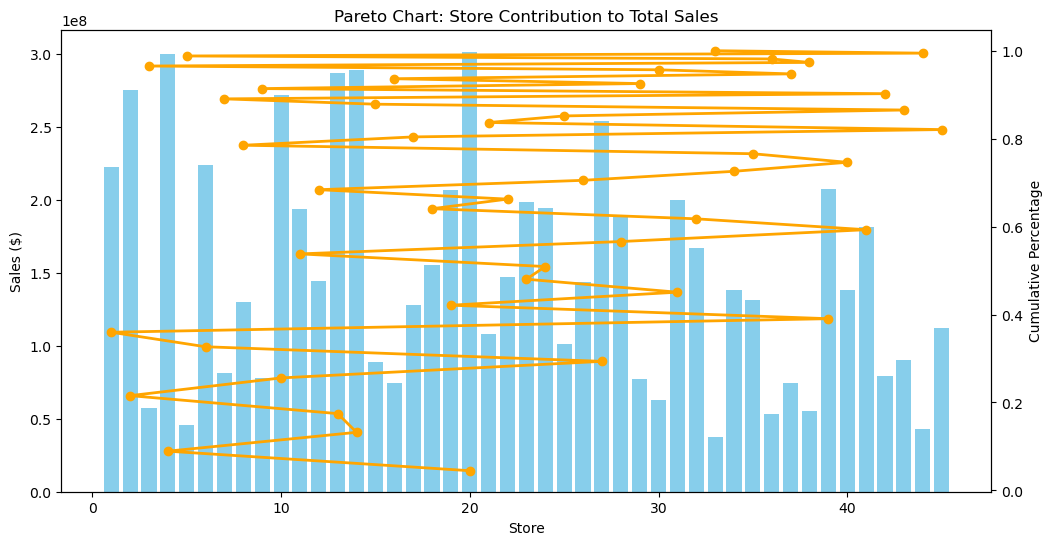

In [13]:
# Calculate store contributions
store_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
cumulative_sales = store_sales.cumsum() / store_sales.sum()

# Plot Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(store_sales.index, store_sales.values, color='skyblue')
ax2 = ax1.twinx()
ax2.plot(store_sales.index, cumulative_sales, color='orange', marker='o', linewidth=2)
plt.title('Pareto Chart: Store Contribution to Total Sales')
ax1.set_xlabel('Store')
ax1.set_ylabel('Sales ($)')
ax2.set_ylabel('Cumulative Percentage')
plt.show()


## Consumer Price Index Vs Weekly Sales & Unemployment vs Weekly Sales
* ### Sales show a weak negative trend with CPI and unemployment, implying a limited influence of these factors on weekly sales.

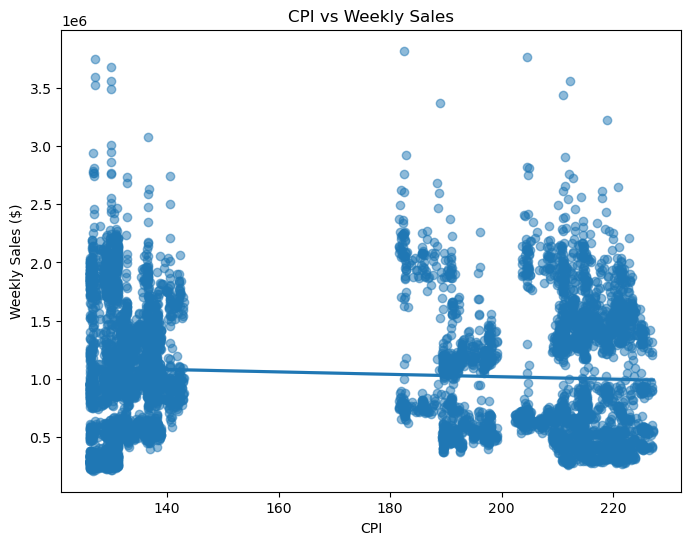

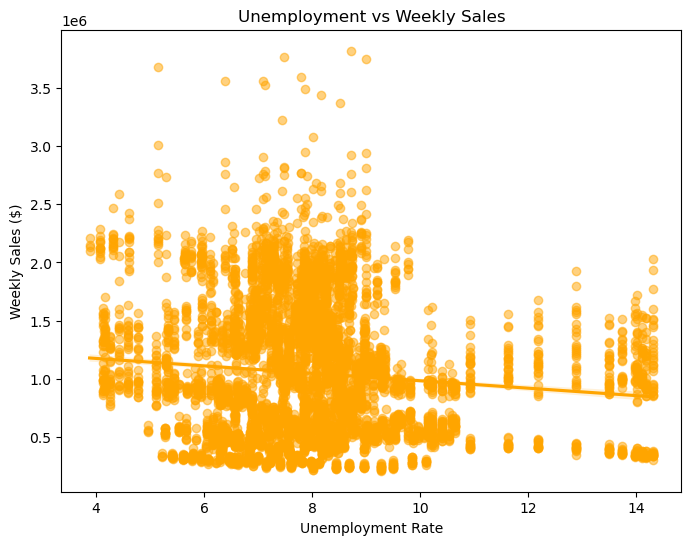

In [27]:
# CPI vs Sales
plt.figure(figsize=(8, 6))
sns.regplot(x='CPI', y='Weekly_Sales', data=data, scatter_kws={'alpha': 0.5})
plt.title('CPI vs Weekly Sales')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales ($)')
plt.show()

# Unemployment vs Sales
plt.figure(figsize=(8, 6))
sns.regplot(x='Unemployment', y='Weekly_Sales', data=data, scatter_kws={'alpha': 0.5}, color='orange')
plt.title('Unemployment vs Weekly Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Weekly Sales ($)')
plt.show()


## Sales Forecast
* ### Predicted sales remain stable with seasonal variations.
* ### Forecasted peaks align with observed historical trends, reinforcing the seasonal impact on sales.

16:29:41 - cmdstanpy - INFO - Chain [1] start processing
16:29:43 - cmdstanpy - INFO - Chain [1] done processing


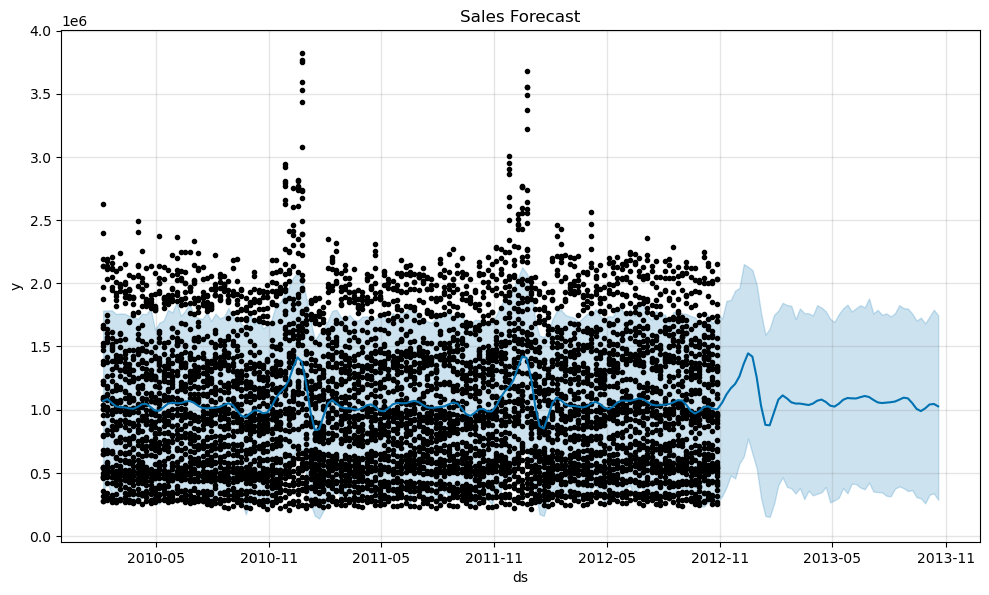

In [33]:
from prophet import Prophet

# Prepare data for Prophet
forecast_data = data[['Date', 'Weekly_Sales']].rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})

# Fit the model
model = Prophet()
model.fit(forecast_data)

# Make predictions
future = model.make_future_dataframe(periods=52, freq='W')
forecast = model.predict(future)

# Plot forecast
model.plot(forecast)
plt.title('Sales Forecast')
plt.show()


## Store Clustering by Temperature Insights : 

1. **Cluster 0 (Purple)**:
   - **Weekly Sales**: $0.5M to $1.0M
   - **Temperature**: 40°F to 60°F
   - Represents low-performing stores, likely in less dense or rural areas.


2. **Cluster 1 (Teal)**:
   - **Weekly Sales**: $1.5M to $2.0M
   - **Temperature**: 50°F to 60°F
   - High-performing stores, major contributors to overall sales, likely urban or high-demand areas.


3. **Cluster 2 (Yellow)**:
   - **Weekly Sales**: Around $1.0M
   - **Temperature**: 65°F to 75°F
   - Moderate-performing stores in warmer climates. 

Focus should be on **Cluster 1** for growth, while exploring improvement opportunities in **Cluster 0**.

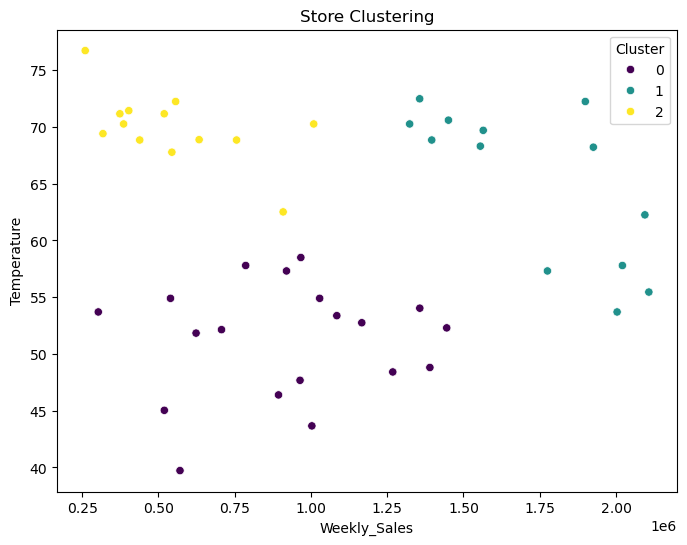

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = data.groupby('Store')[['Weekly_Sales', 'Temperature']].mean()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
features['Cluster'] = kmeans.fit_predict(scaled_features)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Weekly_Sales', y='Temperature', hue='Cluster', data=features, palette='viridis')
plt.title('Store Clustering')
plt.show()
